# **Import Modules**

## *python*

In [5]:
# Import python modules
import os
import sys

## *custom*

In [6]:
# Import customised modules

# Define path
sys.path.append(os.path.abspath(os.path.join("..")))

# Import relevant modules
try:
    from scripts._01_eda import BrentOilDiagnostics

    print("Module successfully imported.")

except ImportError:
    print("Could not import module from `scripts/`.")

Module successfully imported.


# **Data Analysis and Preprocessing**

In [7]:
# Load class input paths
# Specify directory
ntbk_dir = os.getcwd()  # Gets the directory of the notebook

price_path = os.path.join(ntbk_dir, "..", "data", "raw", "BrentOilPrices.csv")
plot_dir = os.path.join(ntbk_dir, "..", "insights", "eda")
processed_dir = os.path.join(ntbk_dir, "..", "data", "processed")


Plot saved to ..\insights\eda\brent_oil_prices_over_time.png


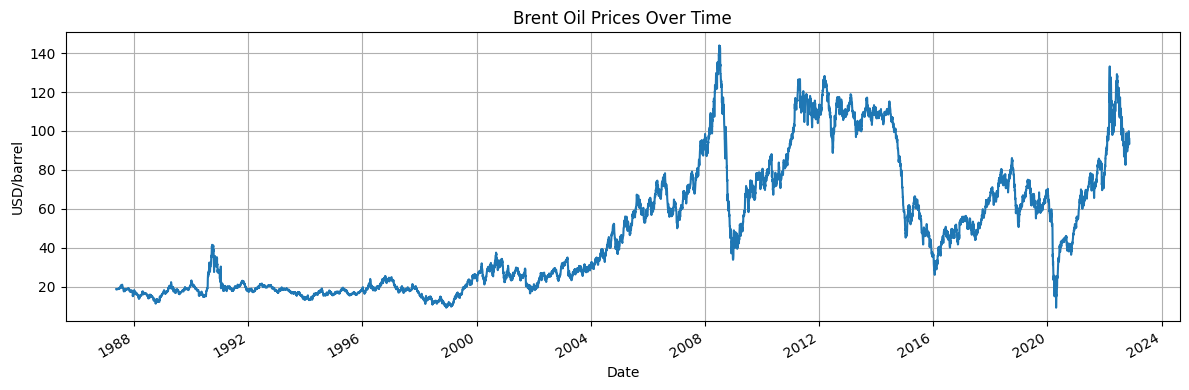


Plot saved to ..\insights\eda\rolling_mean_overlay.png


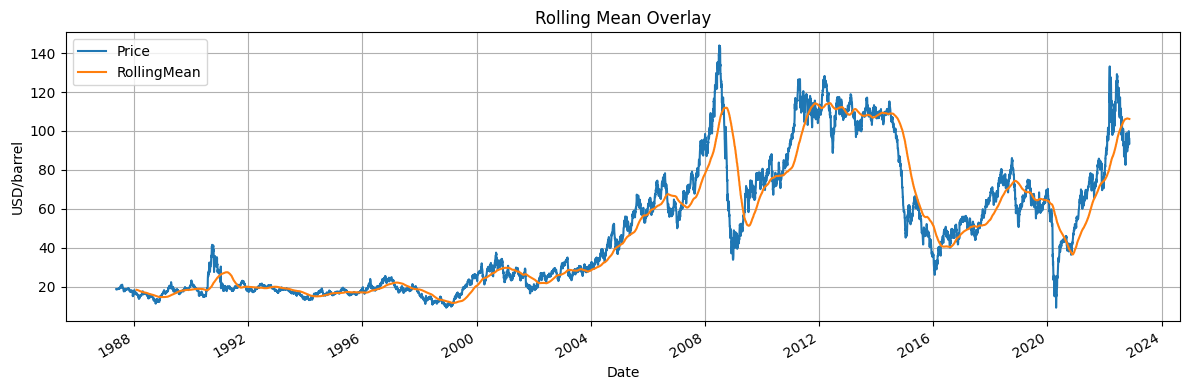


Plot saved to ..\insights\eda\rolling_volatility_(std_dev).png


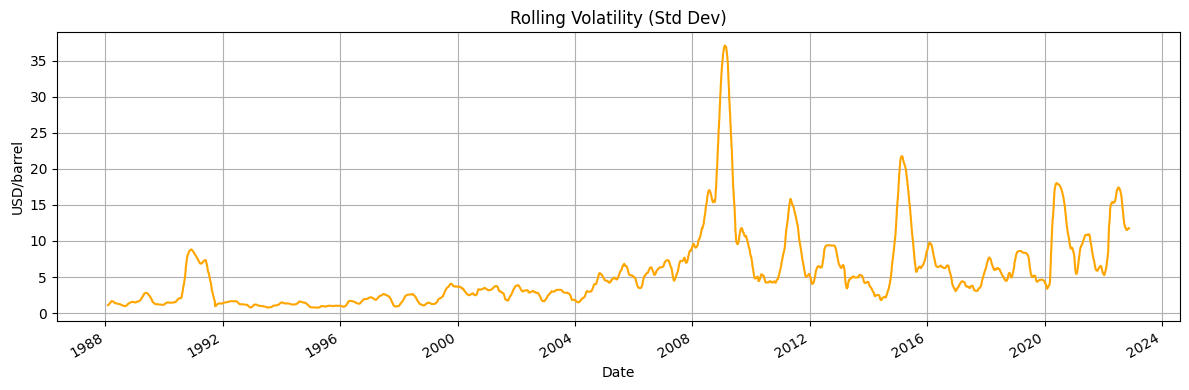

Price — ADF p-value:                0.2893 → Lower = More stationarity
Price — KPSS p-value:                0.0100 → Higher = More stationarity


Plot saved to ..\insights\eda\log_returns_of_brent_prices.png


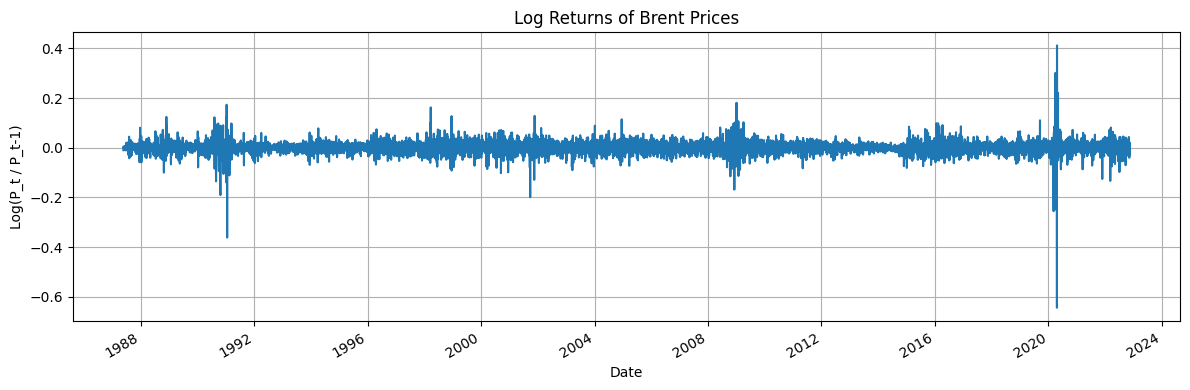

LogReturn — ADF p-value:                0.0000 → Lower = More stationarity
LogReturn — KPSS p-value:                0.1000 → Higher = More stationarity

Enriched DataFrame saved to ..\data\processed.
DataFrame Head:


,Date,Price,RollingMean,RollingStd,LogReturn
0,1987-05-20,18.63,NaN,NaN,NaN
1,1987-05-21,18.45,NaN,NaN,-0.009709
2,1987-05-22,18.55,NaN,NaN,0.005405
3,1987-05-25,18.60,NaN,NaN,0.002692
4,1987-05-26,18.63,NaN,NaN,0.001612



Shape: (9011, 5)

Columns: ['Date', 'Price', 'RollingMean', 'RollingStd', 'LogReturn']

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         9011 non-null   datetime64[ns]
 1   Price        9011 non-null   float64       
 2   RollingMean  8832 non-null   float64       
 3   RollingStd   8832 non-null   float64       
 4   LogReturn    9010 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 352.1 KB

Describe:


,Date,Price,RollingMean,RollingStd,LogReturn
count,9011,9011.000000,8832.000000,8832.000000,9010.000000
mean,2005-02-10 23:46:53.760958720,48.420782,48.183742,5.417169,0.000179
min,1987-05-20 00:00:00,9.100000,11.557944,0.745907,-0.643699
25%,1996-03-20 12:00:00,19.050000,19.410639,1.843750,-0.011154
50%,2005-02-02 00:00:00,38.570000,40.542417,3.930260,0.000402
75%,2014-01-09 12:00:00,70.090000,68.528569,6.765739,0.012127
max,2022-11-14 00:00:00,143.950000,114.364389,37.100190,0.412023
std,NaN,32.860110,31.735129,5.177943,0.025532


In [8]:
eda = BrentOilDiagnostics(
    price_path=price_path,
    plot_dir=plot_dir,
    processed_dir=processed_dir,
    rolling_window=180,
)
df_enriched = eda.run_diagnostics()
eda.get_processed_data()